In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

import os


# Description du projet

Capteur d'humidité du sol

In [3]:
os.system('scp pi@192.168.1.204:/home/pi/E2_watering/report/soil_moisture.csv  /home/iomys/Programmation/E2_watering/report/soil_moisture.csv')

0

In [4]:
df = pd.read_csv('soil_moisture.csv', parse_dates=True,index_col='timestamp',sep='\s*,\s*',engine='python')
df

,chinois,cap1,cap2,soil temperature,temperature,humidity
timestamp,,,,,,
2021-05-18 22:13:03.930138,719,855,381,11.6875,NaN,NaN
2021-05-18 22:14:03.311809,726,836,383,11.6875,NaN,NaN
2021-05-18 22:15:03.686890,722,832,383,11.6875,NaN,NaN
2021-05-18 22:16:03.989089,734,837,383,11.6875,NaN,NaN
2021-05-18 22:17:03.348559,738,857,383,11.6875,NaN,NaN
...,...,...,...,...,...,...
2021-05-26 19:06:03.729401,996,957,341,13.9375,19.100571,34.0
2021-05-26 19:07:04.384085,1002,956,340,13.9375,19.116211,34.0
2021-05-26 19:08:03.997768,998,962,341,13.9375,19.117928,34.0


In [5]:

#df2["2021-05-12":"2021-05-18"]

<AxesSubplot:xlabel='timestamp'>

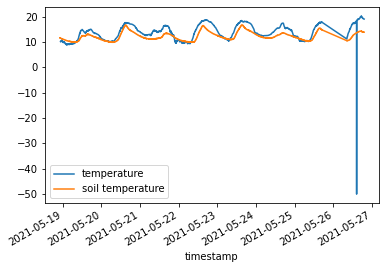

In [6]:
df[df.index >"2021-05-18 18:00"][["temperature", "soil temperature"]].plot()

df2

<AxesSubplot:label='719bf0c4-4d01-493d-be67-b8a30cdaac99', xlabel='timestamp'>

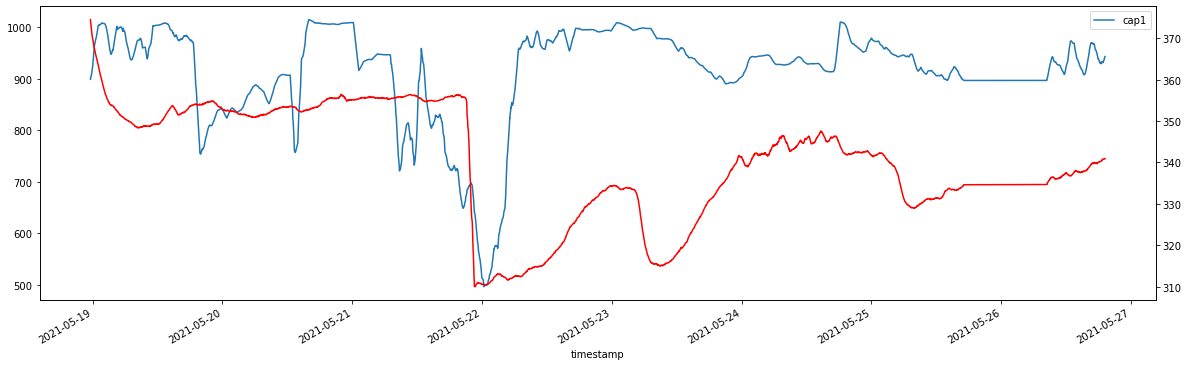

In [7]:
df3 = df[["cap1", "cap2", "chinois"]]
df3 = df3[df3['cap1']<=1024]
df3 = df3[df3['cap2']<=1024]
df3 = df3[df3['chinois']<=1024]
#df3 = df3[df2.index >"2021-05-21 18:00"][["cap1", "cap2", "chinois"]]
#df3 = df3[df3.index <"2021-05-22 06:00"][["cap1", "cap2", "chinois"]]


#chinois
df3 = df3[((df3.chinois.shift() - df3.chinois)<50)] #Supression des sauts négatifs
df3 = df3[((df3.chinois - df3.chinois.shift())<50)] #Supression des sauts positifs

#cap1
df3 = df3[((df3.cap1.shift() - df3.cap1)<20)] #Supression des sauts négatifs
df3 = df3[((df3.cap1 - df3.cap1.shift())<20)] #Supression des sauts positifs

#cap2
df3 = df3[((df3.cap2.shift() - df3.cap2)<20)] #Supression des sauts négatifs
df3 = df3[((df3.cap2 - df3.cap2.shift())<20)] #Supression des sauts positifs

#Moving Average
df3 = df3.rolling(60).mean()

#Création du plot
ax=df3["cap1"].plot(figsize=(20, 6), legend=["cap1", "cap2"])
ax1 = ax.twinx()
df3["cap2"].plot(ax=ax1, color="red")


<AxesSubplot:xlabel='timestamp'>

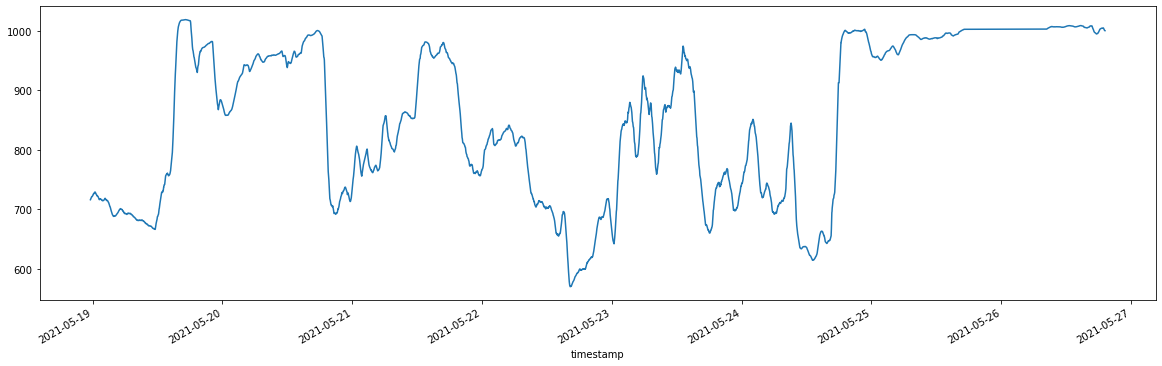

In [8]:
df3.chinois.plot(figsize=(20, 6))